In [1]:
require('rstan')

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.3, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



### how do I get a dirichlet(2,1,1) to run?
Ok so I can do dirichlet(dl) where dl[1]=2, dl[2]=1 for M1 (see tmp_models6/m1_1.stan)


### Which priors do we want for M2??

inv_gamma(20,2)
inv_gamma(10,1)
inv_gamma(5,1)
inv_gamma(1,1)

dirichlet(2,1,1,1)
dirichlet(1,1,1,1)

In [4]:
require('invgamma')

Loading required package: invgamma



[1] 0.45879

[1] 1

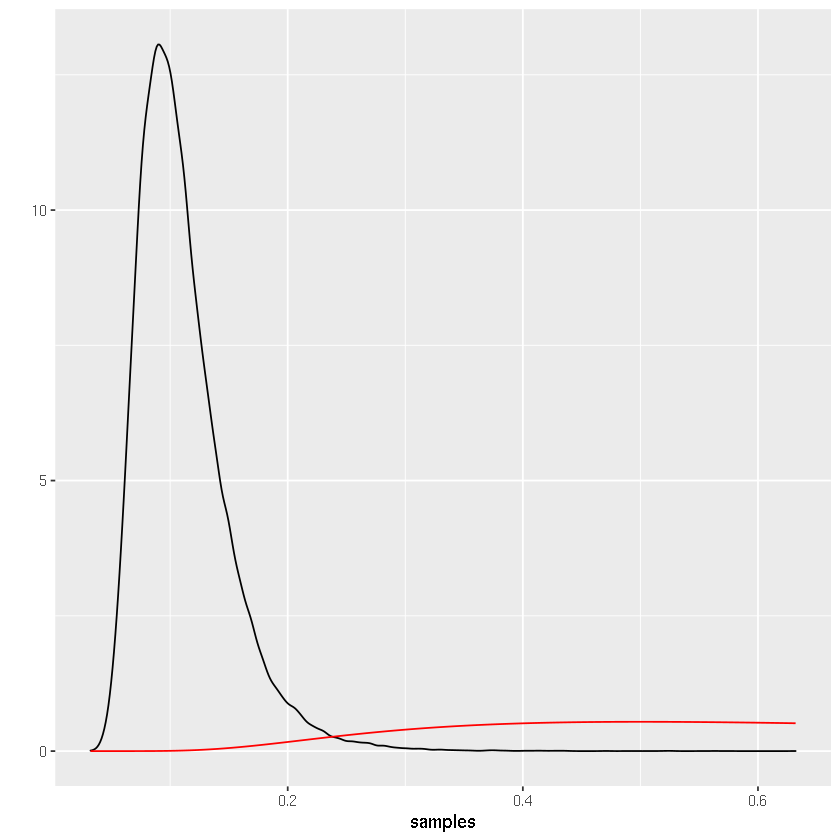

In [6]:
rinvgamma(10e4, 10, 1) -> samples 
mean(samples <= .1)
mean(samples <= 1)
f <- function(x) dinvgamma(x, 1, 1)
qplot(samples, geom = "density") + stat_function(fun = f, color = "red")

In [12]:
# read in the GWAS data
# does it look ok?
require('data.table')
testosterone <- fread("../../../data/gwas/ukb24983_v2_hg19.Testosterone_zerosex.genotyped.glm.linear", data.table=FALSE)

In [14]:
require('tidyverse')


Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  3.0.1     ✔ purrr   0.3.4
✔ tidyr   0.8.3     ✔ dplyr   0.8.5
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  3.0.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ tidyr::extract()   masks rstan::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



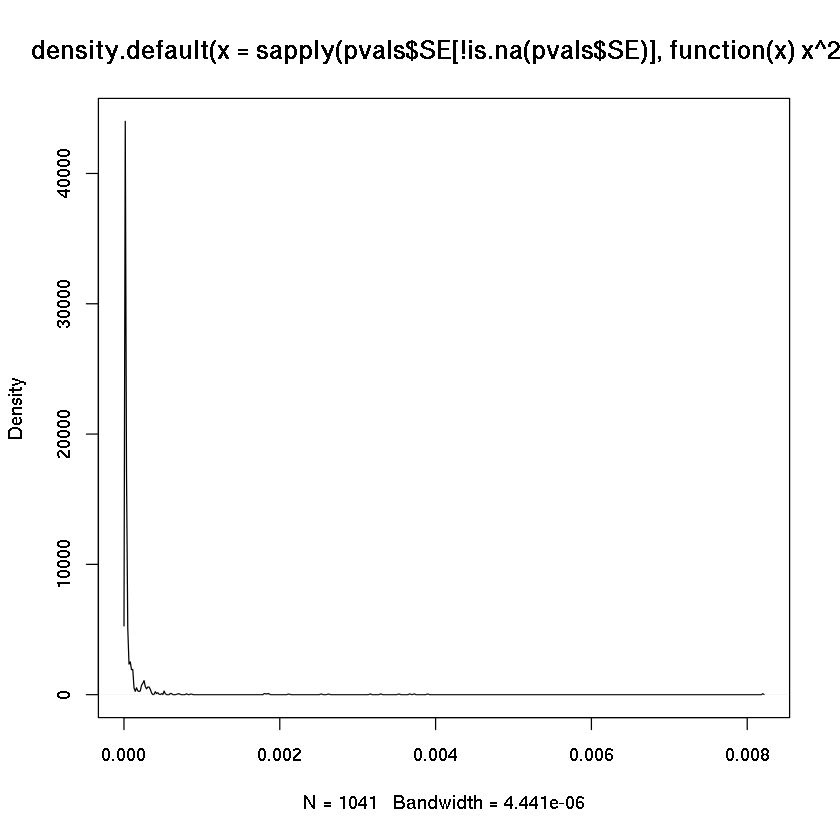

In [16]:
pvals <- testosterone %>% filter(P < 10**-5)
plot(density(pvals$))
plot(density(sapply(pvals$SE[!is.na(pvals$SE)], function(x) x**2)))

### Do my M1 priors make sense? is there anything else I should try?